<a href="https://colab.research.google.com/github/dvircohen0/Machine-Learning-Algorithms-From-Scratch/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tqdm.notebook as tq
from numpy import loadtxt
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [119]:
from sklearn.datasets import load_iris
my_iris = load_iris()
X = my_iris["data"][:,0:2]
y = np.array([1 if x==0 else 0 for x in my_iris["target"]])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X) 
x_train,x_test,y_train,y_test = train_test_split(scaled_data,y)

In [120]:
class SVM:
  def __init__(self, lr=0.001,lambdaa = 0.01, iters=1000):
    self.lr = lr
    self.lambdaa = lambdaa
    self.iters = iters
    self.W = None
    self.b = None

  def fit(self,X,y):
    _y =np.where(y <=0, -1, 1)
    n_samples, n_features = X.shape
    self.W = np.zeros(n_features)
    self.b = 0

    #gradient loop
    for _ in tq.tqdm(range(self.iters), desc='gradient decent'):
      for idx, x_i in enumerate(X):
        if _y[idx] * (np.dot(x_i, self.W) - self.b) >= 1:
          self.W -= self.lr * (2 * self.lambdaa * self.W)
        else:
          self.W -= self.lr * (2 * self.lambdaa * self.W) - np.dot(x_i,_y[idx])
          self.b -= self.lr * _y[idx]


  def predict(self,X):
    y_predict = np.dot(X, self.W) - self.b
    return np.sign(y_predict)


  def score(self,X,y):
    _y =np.where(y <=0, -1, 1)
    accuracy = np.sum(_y==self.predict(X)) / len(_y)
    return accuracy

In [121]:
clf = SVM()
clf.fit(x_train,y_train)

print('accuracy score {:.2%}'.format(clf.score(x_test,y_test)))


accuracy score 100.00%


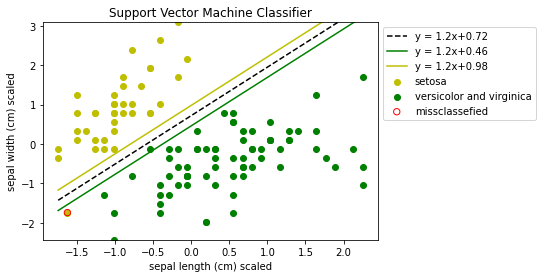

In [123]:

def visualize_svm(X,y):
     def get_hyperplane_value(x, w, b, offset):
          return (-w[0] * x + b + offset) / w[1]

     _y =np.where(y <=0, -1, 1)
     fig = plt.figure()
     ax = fig.add_subplot(1,1,1)
     plt.scatter(*X[_y==1].T, marker='o',c='y',label=my_iris.target_names[0])
     plt.scatter(*X[_y==-1].T, marker='o',c='g',label=my_iris.target_names[1] + ' and ' + my_iris.target_names[2])


     y_pred = clf.predict(X)
     
     missclassefied = np.array([(X[i,0],X[i,1]) for i in range(len(y)) if _y[i]!=y_pred[i]])
     plt.scatter(missclassefied[:,0],
                  missclassefied[:,1],
                  s=40,marker ='o',
                  facecolors='none',
                  color='r',edgecolors='r',
                  label='missclassefied')

     x0_1 = np.amin(X[:,0])
     x0_2 = np.amax(X[:,0])

     x1_1 = get_hyperplane_value(x0_1, clf.W, clf.b, 0)
     x1_2 = get_hyperplane_value(x0_2, clf.W, clf.b, 0)

     x1_1_m = get_hyperplane_value(x0_1, clf.W, clf.b, -1)
     x1_2_m = get_hyperplane_value(x0_2, clf.W, clf.b, -1)

     x1_1_p = get_hyperplane_value(x0_1, clf.W, clf.b, 1)
     x1_2_p = get_hyperplane_value(x0_2, clf.W, clf.b, 1)

     if (clf.b/clf.W[1]) <= 0:
       label='y = {:.2}x{:.2}'.format(-1*clf.W[0]/clf.W[1],clf.b/clf.W[1])
     else: label ='y = {:.2}x+{:.2}'.format(-1*clf.W[0]/clf.W[1],clf.b/clf.W[1])

     if ((clf.b-1)/clf.W[1]) <= 0:
       label_m='y = {:.2}x{:.2}'.format(-1*clf.W[0]/clf.W[1],(clf.b-1)/clf.W[1])
     else: label_m ='y = {:.2}x+{:.2}'.format(-1*clf.W[0]/clf.W[1],(clf.b-1)/clf.W[1])

     if ((1+clf.b)/clf.W[1]) <= 0:
       label_p='y = {:.2}x{:.2}'.format(-1*clf.W[0]/clf.W[1],(1+clf.b)/clf.W[1])
     else: label_p ='y = {:.2}x+{:.2}'.format(-1*clf.W[0]/clf.W[1],(1+clf.b)/clf.W[1])


     ax.plot([x0_1, x0_2],[x1_1, x1_2], 'k--',label=label)
     ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'g',label=label_m)
     ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'y',label=label_p)

     x1_min = min(np.amin(X[:,1]),np.amin(X[:,0]))
     x1_max = max(np.amax(X[:,1]),np.amax(X[:,0]))
     ax.set_ylim([x1_min,x1_max])
     plt.legend(bbox_to_anchor=(1, 1))
     plt.title('Support Vector Machine Classifier')
     plt.ylabel(my_iris.feature_names[1] + ' scaled')
     plt.xlabel(my_iris.feature_names[0] + ' scaled')
     plt.show()

visualize_svm(x_train,y_train)

In [124]:
from sklearn.svm import LinearSVC

SVM =  LinearSVC(max_iter=2000)
SVM.fit(x_train, y_train)

print('SKlearn accuracy percentage {:.2%}'.format(SVM.score(x_test,y_test)))  

SKlearn accuracy percentage 100.00%
